# Loris Data Science Challenge

In [180]:
# Setting up environment
import os, pandas as pd, matplotlib.pyplot as plt

In [270]:
dial_act = open("data/train/train/dialogues_act_train.txt", 'r' , encoding = "utf8")
dial_text = open("data/train/train/dialogues_train.txt", 'r' , encoding = "utf8")
dial_emo = open("data/train/train/dialogues_emotion_train.txt", 'r' , encoding = "utf8")


merged = []

dial_act_read = dial_act.read().split(" ")
dial_act_read = dial_act_read[:-1]
dial_act_read = list(map(int, dial_act_read))

dial_emo_read = dial_emo.read().split(" ")
dial_emo_read = dial_emo_read[:-1]
dial_emo_read = list(map(int,dial_emo_read))

dial_text_read = dial_text.read().split("__eou__")
dial_text_read = dial_text_read[:-1]

person = ['A' , 'B'] * (int(len(dial_emo_read)/2))

print(len(dial_emo_read))
print(len(dial_text_read))
print(len(dial_act_read))

merged = [person,dial_act_read, dial_emo_read, dial_text_read]
merged = list(zip(*merged))
merged = pd.DataFrame(merged)
merged.columns = ['Person' , 'Act' , 'Emotion' , 'Conversation']
print(len(merged))
dial_act.close()
dial_text.close()
dial_emo.close()

dial_act_read = []
dial_emo_read = []
dial_text_read = []

87170
87170
87170
87170


In [271]:
merged.head()

,Person,Act,Emotion,Conversation
0,A,3,0,"Say , Jim , how about going for a few beers after dinner ?"
1,B,4,0,You know that is tempting but is really not good for our fitness .
2,A,2,0,What do you mean ? It will help us to relax .
3,B,2,0,Do you really think so ? I don't . It will just make us fat and act silly . Remember last time ?
4,A,2,0,I guess you are right.But what shall we do ? I don't feel like sitting at home .


In [357]:
#Shifting conversation from happiness to sadness
Conv_A = []
Conv_B = []
for i in range(1,len(merged)):
    if(merged['Person'][i]=='A' and merged['Emotion'][i]==5 and merged['Emotion'][i-2]==4):
        #print(i,merged['Emotion'][i])
        Conv_A.append(i)
        
for i in range(1,len(merged)):
    if(merged['Person'][i]=='B' and merged['Emotion'][i]==5 and merged['Emotion'][i-2]==4):
        #print(i,merged['Emotion'][i])
        Conv_B.append(i)

In [359]:
#Total No Of Times Immediate change of emotions from Happiness to Angry
print(len(Conv_A))
print(len(Conv_B))

40
47


In [282]:
for i in range(3):
    print(merged[Conv_A[i]-2:Conv_A[i]+3])

    Person  Act  Emotion                                                                                         Conversation
454      A    1        4                                                                                             Great . 
455      B    2        0                                                                                 \nWhat upsets you ? 
456      A    1        5   My parents called . As usual , they reminded me again that I should have a plan to marry by my ...
457      B    2        0                                                         It is not your mother finding one for you ? 
458      A    1        0                                          I will find one myself , of course . I ’ m a modern girl . 
     Person  Act  Emotion                                                                                         Conversation
1590      A    1        4   Well , I don ’ t mean to boast but all the designs are done by myself and some colleagues

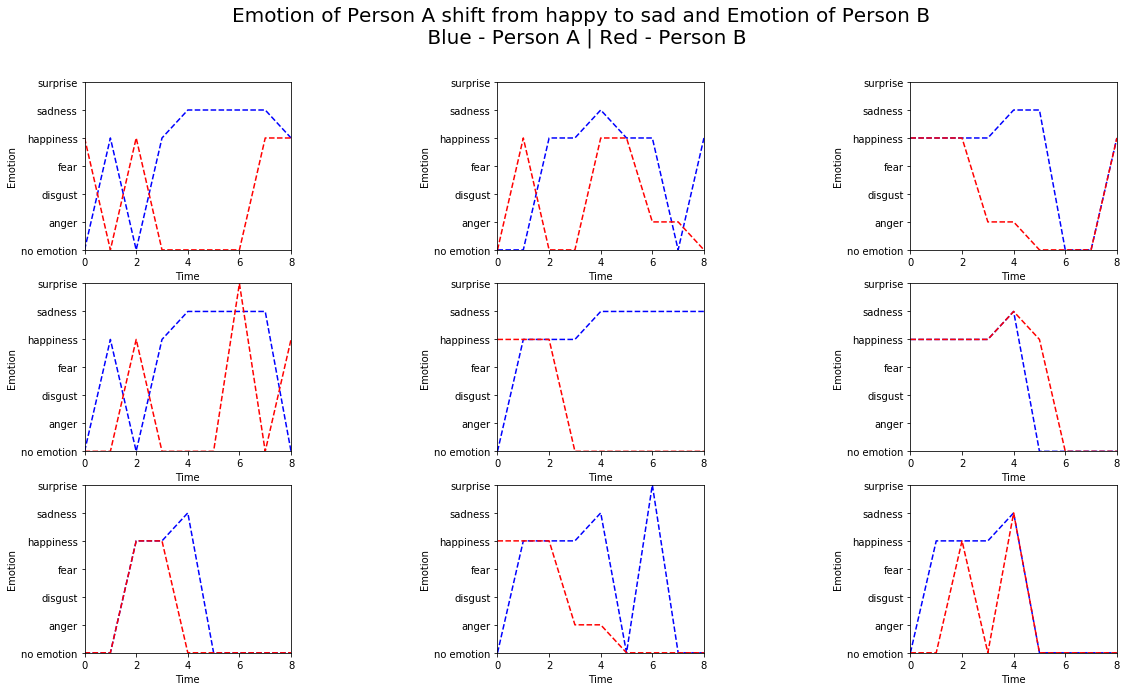

In [356]:
def plot_A(start_from):
    temp = []
    fig = plt.figure()
    fig.subplots_adjust(wspace=1)
    fig.suptitle('Emotion of Person A shift from happy to sad and Emotion of Person B /
                 \n Blue - Person A | Red - Person B', fontsize=20)
    #fig.suptitle('Blue - Person A | Red - Person B', fontsize=10)
    fig.set_size_inches(18.5, 10.5)
    for i in range(1,10):
        a = int(Conv_A[start_from+i-1]/2)
        b = merged['Emotion'][(merged.Person == 'A')][a - 4:a+5]
        c = merged['Emotion'][(merged.Person == 'B')][a - 4:a+5]
        plt.subplot(3, 3, i)    
        plt.plot(list(b), '--b' ,label = 'Person A')
        plt.plot(list(c), '--r' ,label = 'Person B')
        #plt.plot(merged['Emotion'][(merged.Person == 'B')], '-')
        plt.axis([0,len(b) - 1, 0 , 6])
        plt.xlabel('Time')
        plt.ylabel('Emotion')
        plt.yticks(range(7), ['no emotion', 'anger', 'disgust', 'fear', 'happiness', 'sadness','surprise'])
        #plt.title('')
        temp.append(merged[Conv_A[start_from] - 4:Conv_A[start_from]+5])
        temp.append("-------------------------------")
    plt.show() 

plot_A(1)

In [355]:
# conversations for the above plots
print(temp)

[     Person  Act  Emotion                                                                                         Conversation
1588      A    3        0                                                                             Make yourself at home . 
1589      B    4        4                                                                           It is such a nice place . 
1590      A    1        4   Well , I don ’ t mean to boast but all the designs are done by myself and some colleagues are a...
1591      B    3        0                                             \nSteven , would you like to go dance with us tonight ? 
1592      A    4        5                                                         John , I am just not in the mood for this . 
1593      B    2        0                                                               You look so upset . What's going on ? 
1594      A    1        5                                                            I lost the table tennis g

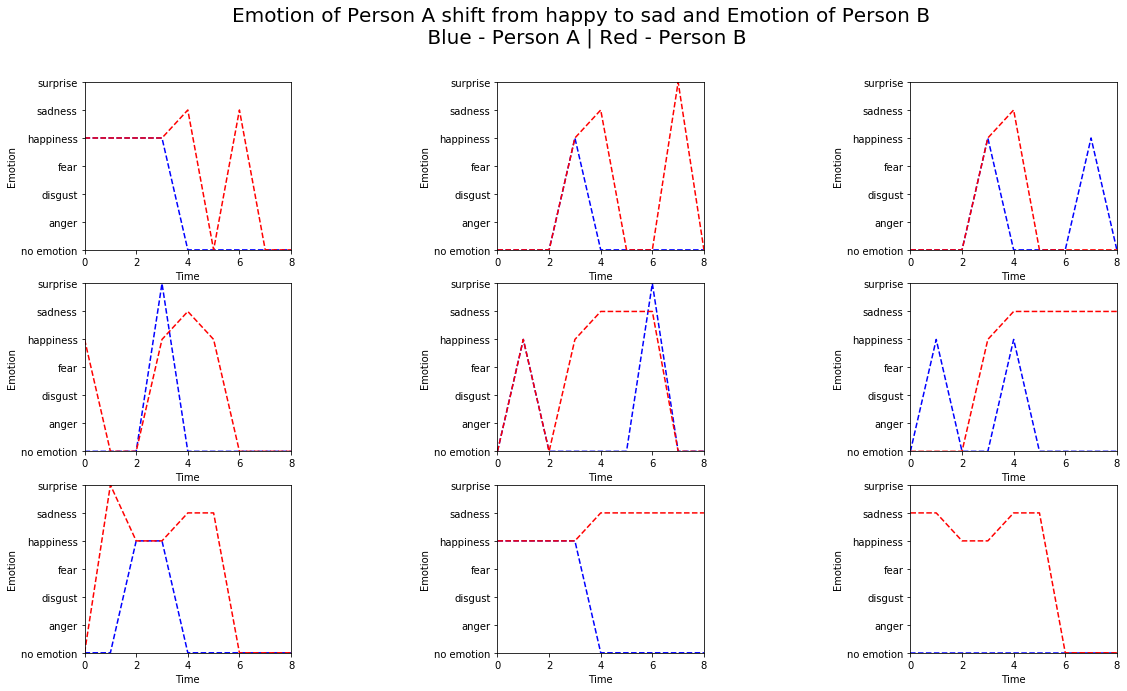

In [360]:
def plot_B(start_from):
    temp = []
    fig = plt.figure()
    fig.subplots_adjust(wspace=1)
    fig.suptitle('Emotion of Person A shift from happy to sad and Emotion of Person B \n Blue - Person A | Red - Person B', fontsize=20)
    #fig.suptitle('Blue - Person A | Red - Person B', fontsize=10)
    fig.set_size_inches(18.5, 10.5)
    for i in range(1,10):
        a = int(Conv_B[start_from+i-1]/2)
        b = merged['Emotion'][(merged.Person == 'A')][a - 4:a+5]
        c = merged['Emotion'][(merged.Person == 'B')][a - 4:a+5]
        plt.subplot(3, 3, i)    
        plt.plot(list(b), '--b' ,label = 'Person A')
        plt.plot(list(c), '--r' ,label = 'Person B')
        #plt.plot(merged['Emotion'][(merged.Person == 'B')], '-')
        plt.axis([0,len(b) - 1, 0 , 6])
        plt.xlabel('Time')
        plt.ylabel('Emotion')
        plt.yticks(range(7), ['no emotion', 'anger', 'disgust', 'fear', 'happiness', 'sadness','surprise'])
        #plt.title('')
        temp.append(merged[Conv_B[start_from] - 4:Conv_B[start_from]+5])
        temp.append("-------------------------------")
    plt.show() 

plot_B(1)

In [361]:
print(temp)

[     Person  Act  Emotion                                                                                         Conversation
1588      A    3        0                                                                             Make yourself at home . 
1589      B    4        4                                                                           It is such a nice place . 
1590      A    1        4   Well , I don ’ t mean to boast but all the designs are done by myself and some colleagues are a...
1591      B    3        0                                             \nSteven , would you like to go dance with us tonight ? 
1592      A    4        5                                                         John , I am just not in the mood for this . 
1593      B    2        0                                                               You look so upset . What's going on ? 
1594      A    1        5                                                            I lost the table tennis g

In [239]:
a = int(s[1]/2)
print(merged[(merged.Person == 'B')][a - 1:a+5])
print(merged[(merged.Person == 'A')][a - 1:a+5])

     Person  Act  Emotion                                                               Conversation
3569      B    1        4                                          Sound like everything is great . 
3571      B    1        5                                                    I am not in the mood . 
3573      B    1        0   I was told my girlfriend was speaking ill of me . It's a real letdown . 
3575      B    1        5                                 But she did and it made me disappointed . 
3577      B    1        0                                               But she means a lot to me . 
3579      B    4        0                                             Oh , I just can't forget it . 
     Person  Act  Emotion                                                                                         Conversation
3568      A    1        4   In the evening , we just sit and talk over dinner . But on the weekend , we try to go out to th...
3570      A    2        0              

In [154]:
#Shifting conversation from happiness to sadness
for i in range(1,len(merged)):
    if(merged['Emotion'][i]==1 and merged['Emotion'][i-1]==4):
        print(i,merged['Emotion'][i])
    #print(merged[i][1])

491 1
2089 1
2776 1
8034 1
8925 1
9321 1
9491 1
9914 1
10627 1
11029 1
12874 1
14589 1
16591 1
16703 1
19084 1
21163 1
24769 1
26181 1
28683 1
28941 1
29126 1
30780 1
32112 1
32529 1
34579 1
34872 1
35215 1
35869 1
40957 1
41075 1
43654 1
43719 1
46533 1
51006 1
53828 1
57274 1
58158 1
61061 1
61166 1
61768 1
61910 1
62753 1
63938 1
64825 1
66651 1
70575 1
81237 1
83418 1
86286 1


In [117]:
merged['Emotion'][1:3]

1    0
2    0
Name: Emotion, dtype: int64

In [152]:
pd.set_option('max_colwidth', 100)
merged[4210:4214]

,Person,Act,Emotion,Conversation
4210,A,1,0,\nLisa wins the first prize in the English speech contest of her college .
4211,B,1,4,Really ? That's really wonderful . I'm so happy for her .
4212,A,1,5,But I always feel disappointed . I have many problems with English learning .
4213,B,1,0,"Honey , cheer up ."


In [128]:
range(1,100)

range(1, 100)

In [56]:
a = []
for i in range(len(dial_act_read)):
    a.append(int(dial_act_read[i]))

ValueError: invalid literal for int() with base 10: ''

[" Okay . I'll just be a minute . ", '\n']